# E-Commerce-Analysis-and-Prediction-Modelling :- Cohort Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
os.makedirs("data/processed", exist_ok=True)

# Load data
df = pd.read_csv("data/processed/transactions_with_features.csv", parse_dates=["InvoiceDate"])

In [2]:
# Define order month and cohort (first purchase month)
df["OrderMonth"] = df["InvoiceDate"].dt.to_period("M")
df["CohortMonth"] = df.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")

In [3]:
# Cohort index (months since first purchase)
cohort_data = (
    df.groupby(["CohortMonth", "OrderMonth"])["CustomerID"]
      .nunique()
      .reset_index()
      .rename(columns={"CustomerID": "NumCustomers"})
)

# Convert to integer index: cohort_period = (OrderMonth - CohortMonth) in months
cohort_data["CohortIndex"] = (
    (cohort_data["OrderMonth"].dt.year - cohort_data["CohortMonth"].dt.year) * 12 +
    (cohort_data["OrderMonth"].dt.month - cohort_data["CohortMonth"].dt.month) + 1
)


In [4]:
# Build retention table
cohort_pivot = cohort_data.pivot_table(
    index="CohortMonth",
    columns="CohortIndex",
    values="NumCustomers"
)

cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

print(retention.head())

CohortIndex   1         2         3         4         5         6         7   \
CohortMonth                                                                    
2023-01      1.0  0.031630  0.060827  0.046229  0.034063  0.058394  0.075426   
2023-02      1.0  0.033708  0.036517  0.033708  0.067416  0.039326  0.044944   
2023-03      1.0  0.040698  0.043605  0.046512  0.058140  0.058140  0.084302   
2023-04      1.0  0.040230  0.031609  0.068966  0.057471  0.048851  0.063218   
2023-05      1.0  0.040498  0.071651  0.071651  0.049844  0.049844  0.052960   

CohortIndex        8         9         10  ...        27        28        29  \
CohortMonth                                ...                                 
2023-01      0.063260  0.053528  0.048662  ...  0.097324  0.138686  0.107056   
2023-02      0.033708  0.050562  0.044944  ...  0.137640  0.126404  0.112360   
2023-03      0.063953  0.058140  0.069767  ...  0.139535  0.095930  0.116279   
2023-04      0.063218  0.066092  0.1867

In [5]:
# Save cohort matrix
retention.to_csv("data/processed/cohort_retention_matrix.csv")

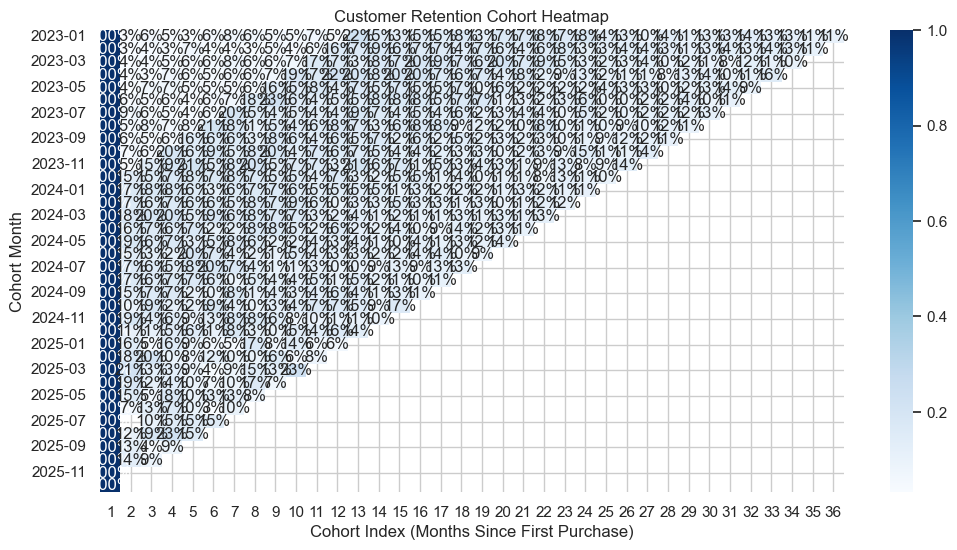

In [6]:
#  Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Customer Retention Cohort Heatmap")
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.show()